In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


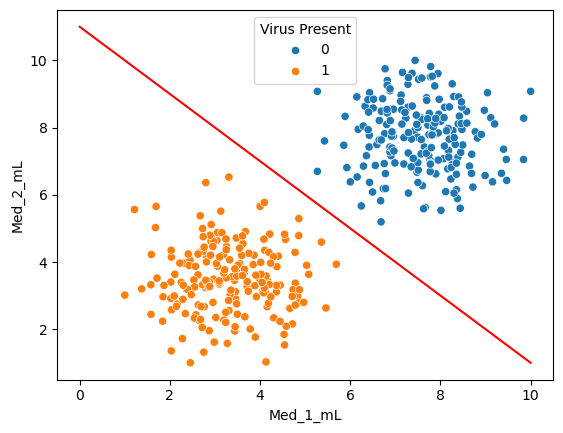

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)
x = np.linspace(0,10,100)
m=-1
b =11
y=m*x+b
plt.plot(x, y, color='red', label='Decision Boundary')

In [6]:
from sklearn.svm import SVC
x = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [12]:
model = SVC(kernel='linear',C=1000)
model.fit(x, y)

SVC(C=1000, kernel='linear')

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


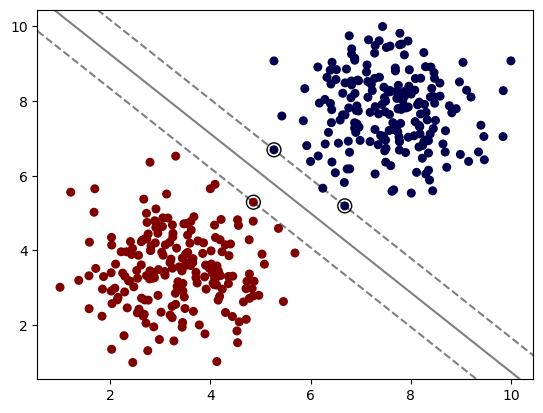

In [13]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(model, x, y)

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


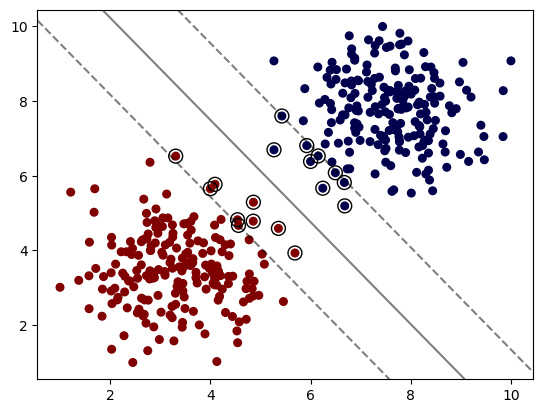

In [ ]:
# C – Regularization strength
# Type: float (positive)
# Controls the trade-off between a smooth decision boundary and classifying training points correctly.
# Small C (e.g., 0.001, 0.01) → More regularization → Decision boundary is smoother but may allow more misclassifications.
# Large C (e.g., 10, 100) → Less regularization → Tries to classify all training points correctly, but may overfit.

model = SVC(kernel='linear',C =0.05)
model.fit(x, y)
plot_svm_boundary(model, x, y)


c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


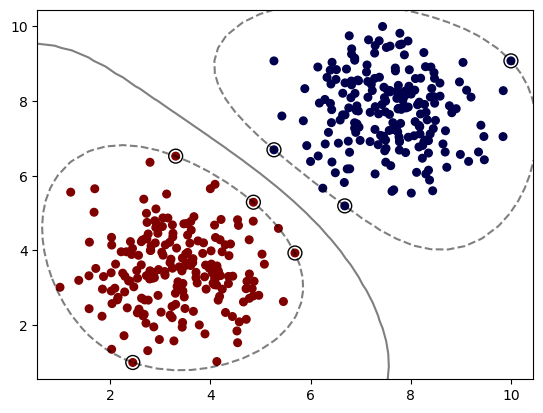

In [17]:
model = SVC(kernel='rbf', C=1000)
model.fit(x, y)
plot_svm_boundary(model, x, y)

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


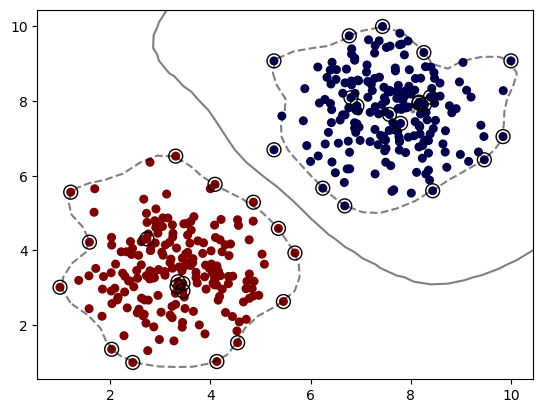

In [ ]:
# Using a different gamma value for the RBF kernel
# This can affect the decision boundary and margin
# don't but gamma as an 'auto' value,
# it will pick up  evry noise which will lead  
# to overfitting
model = SVC(kernel='rbf', C=1,gamma='auto')
model.fit(x, y)
plot_svm_boundary(model, x, y)

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


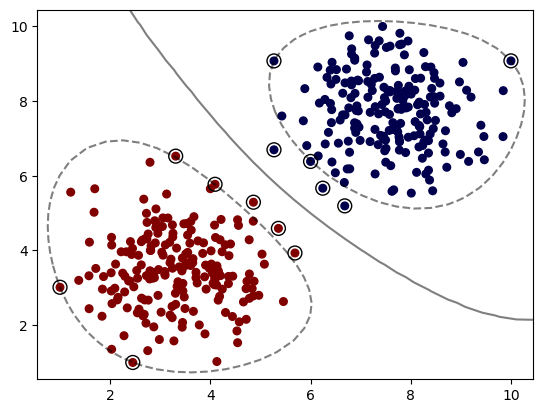

In [25]:
# gamma = scale much better
model = SVC(kernel='rbf', C=1,gamma='scale')
model.fit(x, y)
plot_svm_boundary(model, x, y)

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


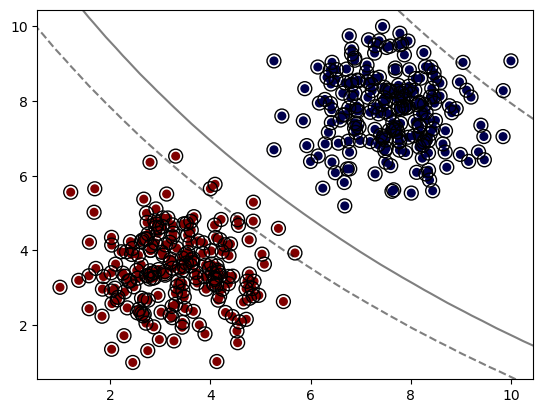

In [ ]:
# try out the sigmoid kernel
#it's not good for this dataset but might be useful for others
model  = SVC(kernel='sigmoid')
model.fit(x, y)
plot_svm_boundary(model, x, y)

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


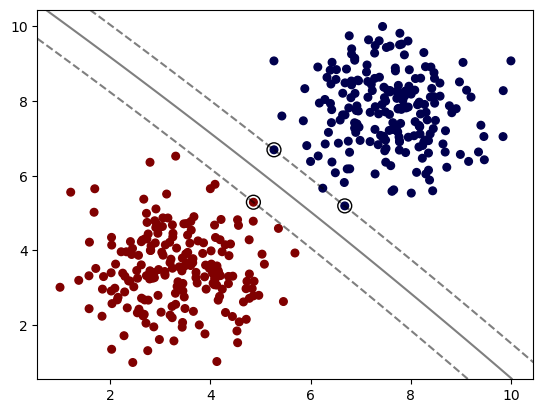

In [ ]:
#more degree more curvy line
model = SVC(kernel='poly',C=1, degree=2)
model.fit(x, y)
plot_svm_boundary(model, x, y)

In [29]:
svm =SVC()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                'gamma': ['scale', 'auto']}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}
